In [0]:
#My practice project for mnist classification using tensorflow tutorial.

#Tensorflow and keras

import tensorflow as tf
from tensorflow import keras

In [0]:
# helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Importing mnist dataset for fashion

fashion_mnist = keras.datasets.fashion_mnist 

In [4]:
#Loading mnist data and saving it in taining/testing label tuples.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#Class names for the dataset.
#these names were found by visually checking each example type and matching it with index of this list.

class_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

In [6]:
#checking the shape of the training image set.
train_images.shape

(60000, 28, 28)

In [7]:
#shape of training labels
train_labels.shape

(60000,)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

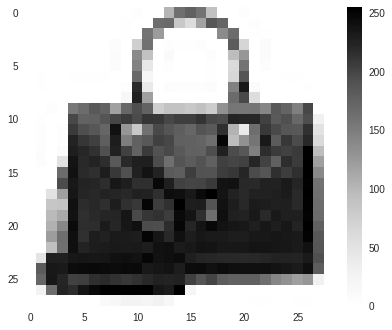

In [9]:
#checking a random train image
plt.imshow(train_images[31210])
plt.colorbar()
plt.gca().grid(False)

In [0]:
#normalizing the images to be from O-1
train_images = train_images/255.0
test_images = test_images/255.0

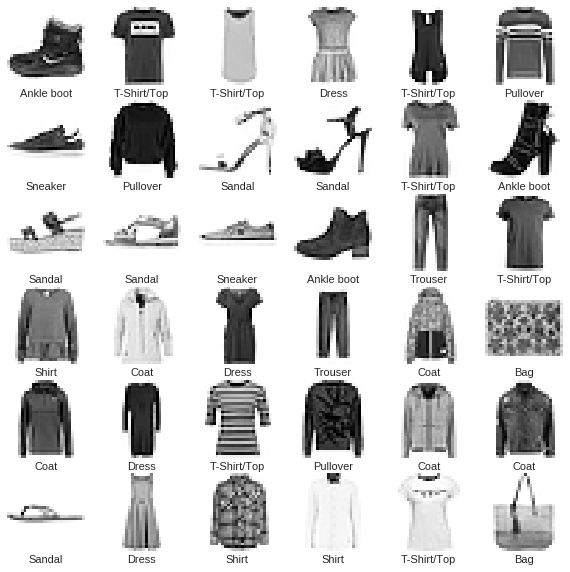

In [11]:
#checking a random train image
plt.figure(figsize=(10,10))
#for 1st 36 images
for i in range (36):
  #plot a subplot of 6x6
  plt.subplot(6,6,i+1)
  #plot using imshow, get train_images at i
  plt.imshow(train_images[i])
  #use the class_names array that we created earlier and pull the label#
  plt.xlabel(class_names[train_labels[i]])
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

In [0]:
#layer1 = Flatten type (input shape is 28x28 image)
#layer2 = Dense type (128 perceptrons that activate non linear relu func)
#layer3 = Dense type (10 possible outputs with softmax function which keeps
         #the total probability to 1)

model = keras.Sequential([
     keras.layers.Flatten(input_shape = (28,28)),  
     keras.layers.Dense(128,activation = tf.nn.relu),    
     keras.layers.Dense(10, activation = tf.nn.softmax)     
     ])

In [0]:
# Making the optimizer and loss function
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy', 
              metrics= ['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.5010 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.3769 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.3406 - acc: 0.8754
Epoch 4/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3158 - acc: 0.8840
Epoch 5/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.2972 - acc: 0.8890


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 1s 50us/step


In [16]:
print ('Test accuracy:', test_acc)

Test accuracy: 0.8662


In [0]:
# prediction

In [0]:
predictions = model.predict(test_images)

In [19]:
# its a numpy array
predictions[10]

array([2.0099647e-05, 1.8512416e-06, 6.5786503e-02, 8.4971980e-06,
       8.2856399e-01, 6.1568767e-07, 1.0561495e-01, 1.2516411e-09,
       3.4636016e-06, 6.0491317e-08], dtype=float32)

In [20]:
# argmax can decode this array and output the number.
np.argmax(predictions[10])

4

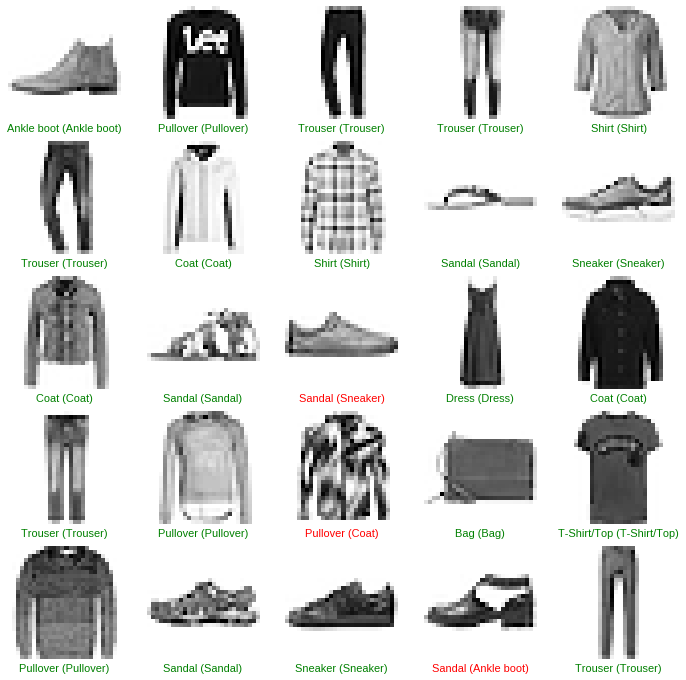

In [21]:
plt.figure(figsize=(12,12))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(test_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label: 
    color = 'green'
  else:
    color = 'red'
  plt.xlabel('{} ({})'.format(class_names[predicted_label],
              class_names[true_label]), color = color)

In [0]:
img = test_images[256]

In [23]:
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [0]:
prediction = model.predict(img)

In [25]:
#checking output of the prediction.
print (class_names[np.argmax(prediction)])

Bag


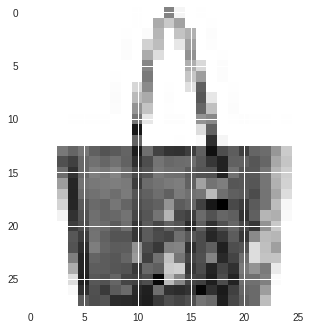

In [26]:
#Checking actual image plot of the output to see if they match.
#bag = bag
plt.imshow(test_images[256])